# Predicting Bike Rental Demand

Link to the data https://archive.ics.uci.edu/ml/machine-learning-databases/00275/. 
*Make sure to download and unzip the dataset into the same folder as this notebook*

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information

**Data Set Information:**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [2]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13, 10)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [5]:
# Load the data into a dataframe
# We use 'parse_dates' to convert the 'dteday' column into a 'datetime64[ns]' data type

df = pd.read_csv('https://drive.google.com/file/d/19lsUg-7ZDgVOdFkAJqlVCowNfbjpQeQd/view?usp=sharing', parse_dates=['dteday'])
df.head()

ValueError: 'dteday' is not in list

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [5]:
# Check for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Check for duplicated values

df.duplicated().sum()

0

# Data Analysis and Preparation

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Attribute Information:**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df['season'].unique()

array([1, 2, 3, 4])

In [10]:
df['yr'].unique()

array([0, 1])

In [11]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [13]:
df['weathersit'].unique()

array([1, 2, 3, 4])

According to the attribute information above, some of the variables are categorical, even though they have been recorded as numbers. We can convert them into their correct categories as follows...

In [14]:
# season (1:winter, 2:spring, 3:summer, 4:fall)
df['season'] = df['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})

# year (0: 2011, 1:2012)
df['yr'] = df['yr'].map({0: 2011, 1:2012})

# month ( 1 to 12)
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

# day of the week
df['weekday'] = df['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

# weather
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})


In [15]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4276,4277,2011-07-02,Summer,2011,July,2,0,Saturday,0,Clear,0.64,0.6212,0.53,0.0000,9,43,52
3329,3330,2011-05-23,Spring,2011,May,15,0,Monday,1,Mist,0.72,0.6818,0.62,0.4478,57,119,176
15124,15125,2012-09-27,Fall,2012,Sept,9,0,Thursday,1,Clear,0.66,0.6212,0.65,0.0000,30,305,335
3667,3668,2011-06-06,Spring,2011,June,17,0,Monday,1,Clear,0.78,0.6818,0.33,0.2836,63,516,579
872,873,2011-02-08,Winter,2011,Feb,19,0,Tuesday,1,Clear,0.16,0.1212,0.40,0.4627,1,100,101


In [16]:
#pp.ProfileReport(df)

# Data Visualization

In [17]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

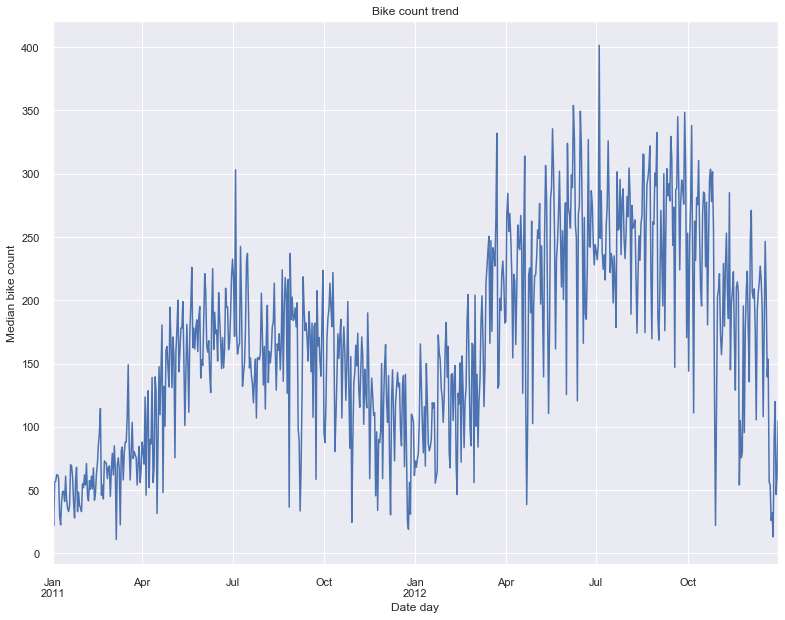

In [19]:
df.groupby('dteday')['cnt'].median().plot.line()
plt.xlabel('Date day')
plt.ylabel('Median bike count')
plt.title('Bike count trend')
plt.show()

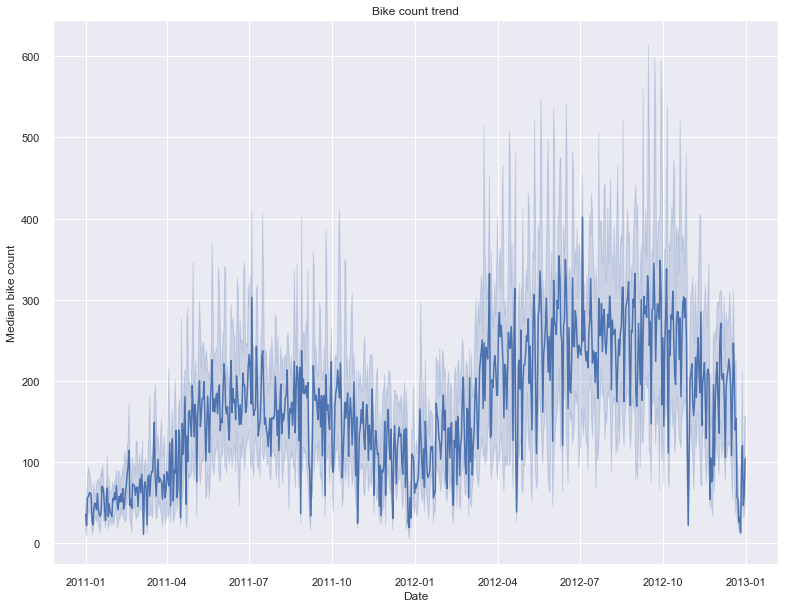

In [20]:
# Seaborn
ax = sns.lineplot(x='dteday', y='cnt', estimator=np.median, data=df)
ax.set(xlabel='Date',
       ylabel='Median bike count',
       title='Bike count trend')
plt.show()

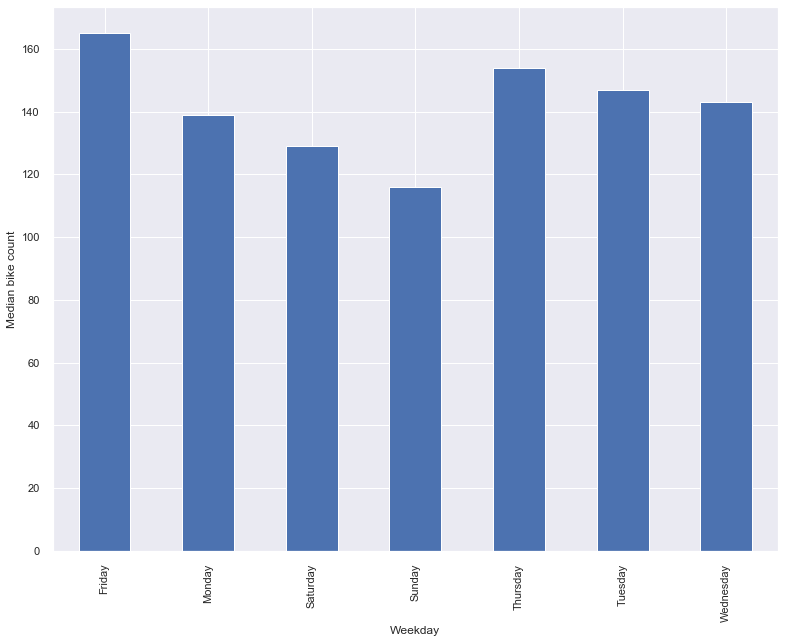

In [21]:
df.groupby('weekday')['cnt'].median().plot.bar()
plt.xlabel('Weekday')
plt.ylabel('Median bike count')
plt.show()

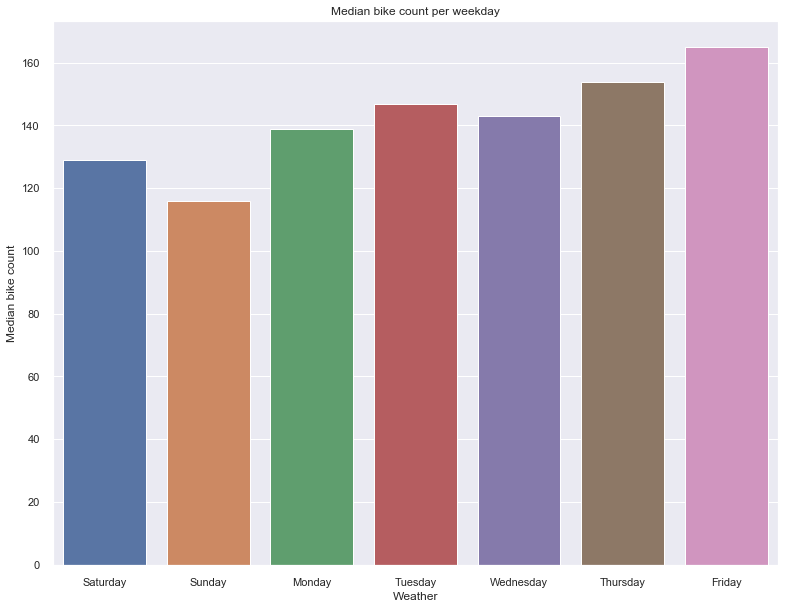

In [22]:
# Seaborn
ax = sns.barplot(x = 'weekday', y = 'cnt', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Weather',
       ylabel='Median bike count',
       title='Median bike count per weekday')
plt.show()

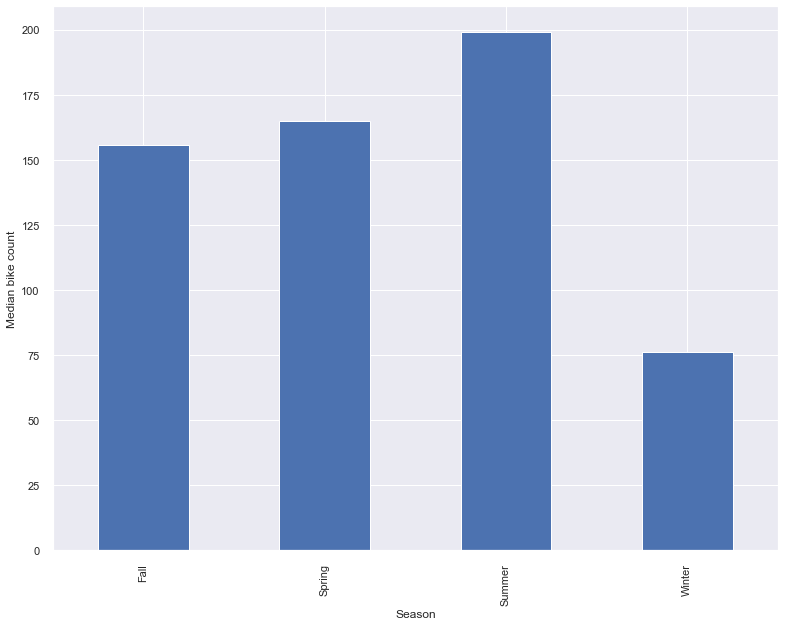

In [23]:
df.groupby('season')['cnt'].median().plot.bar()
plt.xlabel('Season')
plt.ylabel('Median bike count')
plt.show()

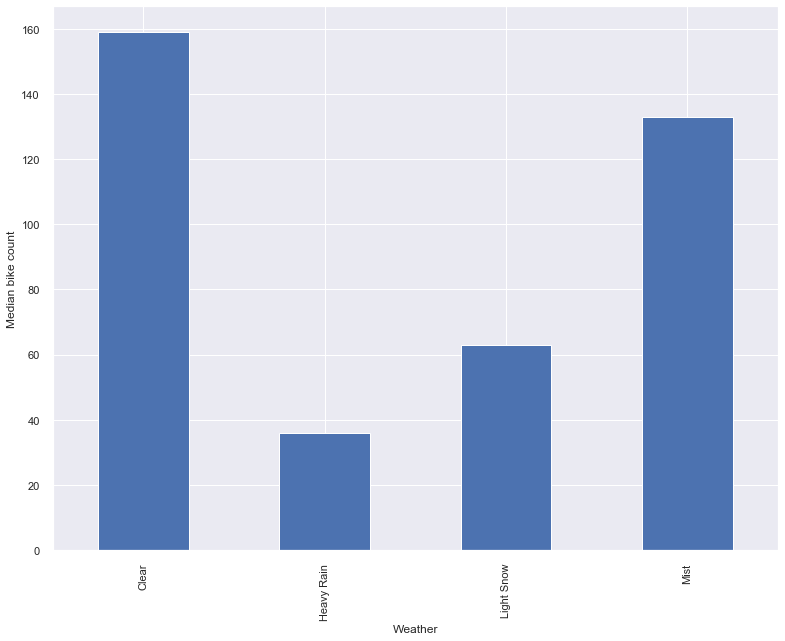

In [24]:
df.groupby('weathersit')['cnt'].median().plot.bar()
plt.xlabel('Weather')
plt.ylabel('Median bike count')
plt.show()

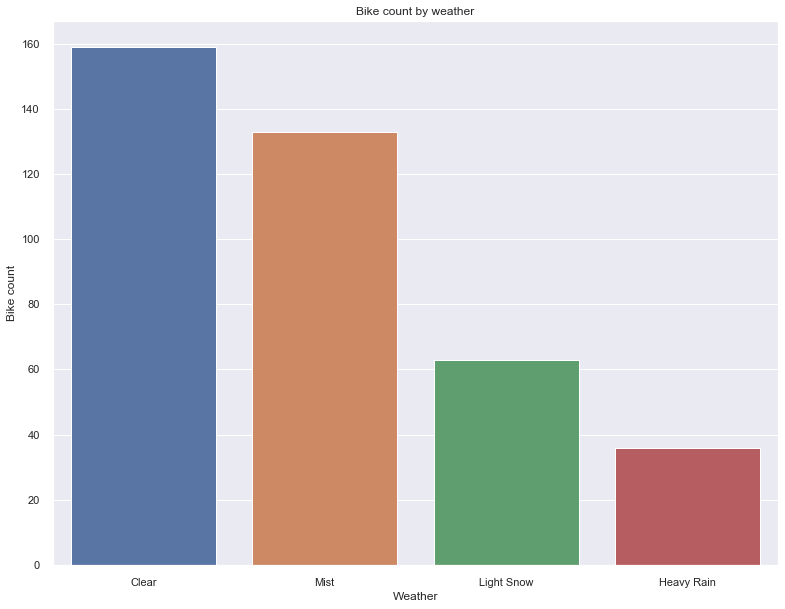

In [25]:
ax = sns.barplot(x = 'weathersit', y = 'cnt', data=df, estimator=np.median, ci=None)
ax.set(xlabel='Weather',
       ylabel='Bike count',
       title='Bike count by weather')
plt.show()

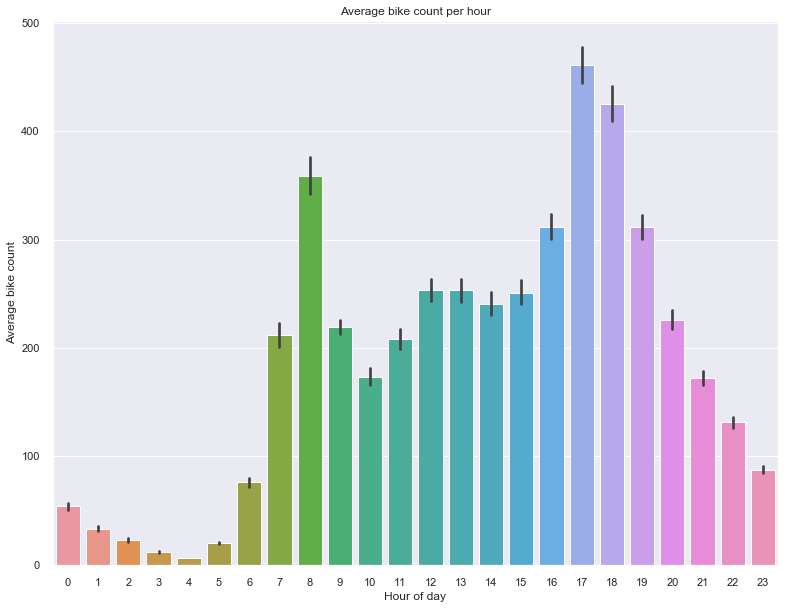

In [26]:
ax = sns.barplot(x='hr', y='cnt', data=df)
ax.set(xlabel='Hour of day',
       ylabel='Average bike count',
       title='Average bike count per hour')
plt.show()

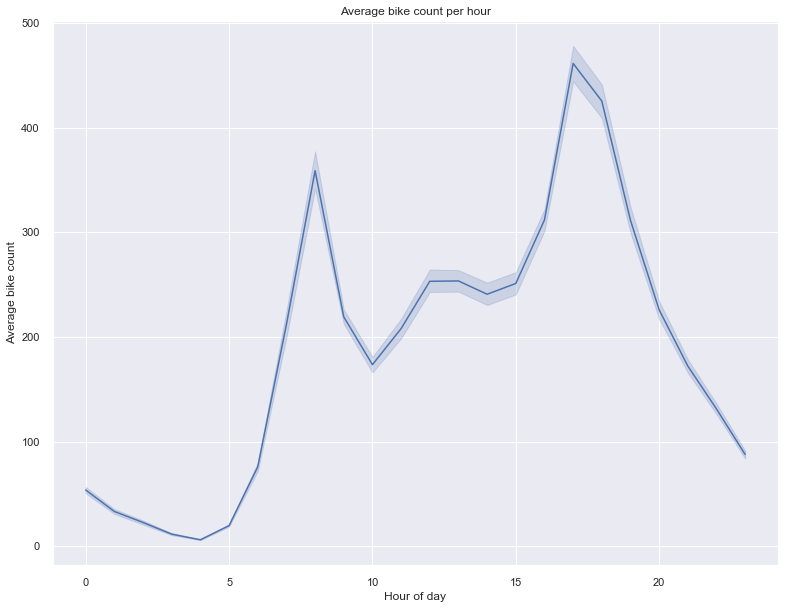

In [27]:
ax = sns.lineplot(x='hr', y='cnt', data=df)
ax.set(xlabel='Hour of day',
       ylabel='Average bike count',
       title='Average bike count per hour')
plt.show()

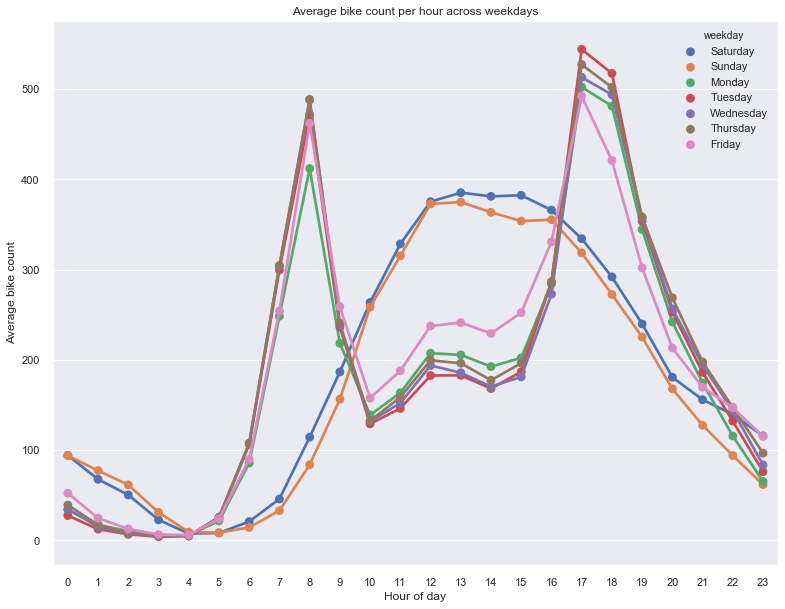

In [28]:
ax = sns.pointplot(x='hr', y='cnt', hue='weekday', ci=None, data=df)
ax.set(xlabel='Hour of day',
       ylabel='Average bike count',
       title='Average bike count per hour across weekdays')
plt.show()

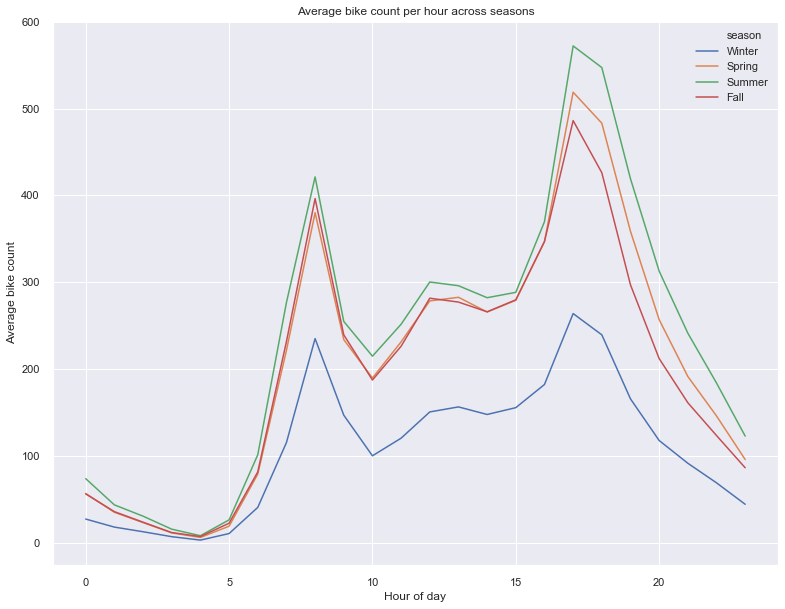

In [29]:
ax = sns.lineplot(x='hr', y='cnt', hue='season', ci=None, data=df)
ax.set(xlabel='Hour of day',
       ylabel='Average bike count',
       title='Average bike count per hour across seasons')
plt.show()

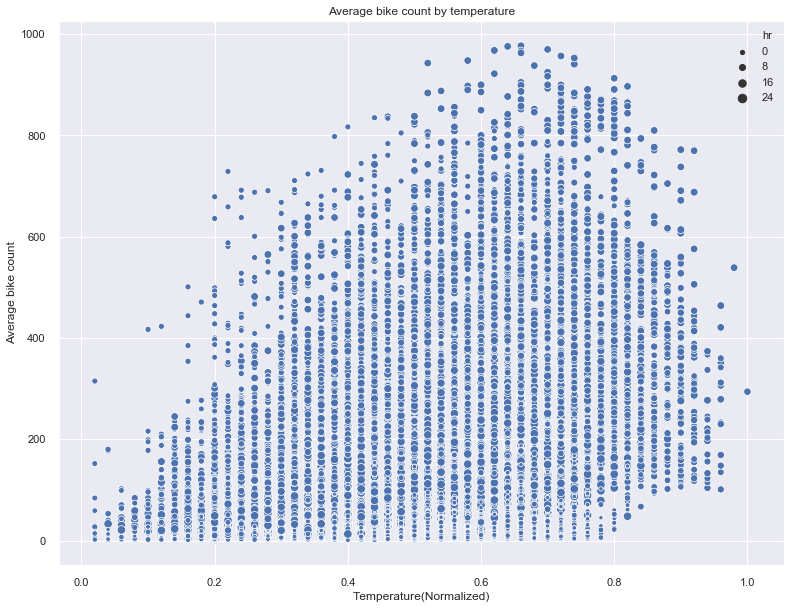

In [30]:
ax = sns.scatterplot(x='temp', y='cnt', size='hr', ci=None, data=df)
ax.set(xlabel='Temperature(Normalized)',
       ylabel='Average bike count',
       title='Average bike count by temperature')
plt.show()

# Feature Engineering

In [31]:
# function to extract the day from the dteday column
# we won't extract year and month since we have them already as columns

def extract_date(df, column):
    df[column+"_day"] = df[column].apply(lambda x: x.day)
    #df[column+"_month"] = df[column].apply(lambda x: x.month)
    #df[column+"_year"] = df[column].apply(lambda x: x.year)
    
extract_date(df, 'dteday')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,1


In [32]:
df['week_of_year'] = df['dteday'].dt.week
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day,week_of_year
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,1,52
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,1,52
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,1,52
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,1,52
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,1,52


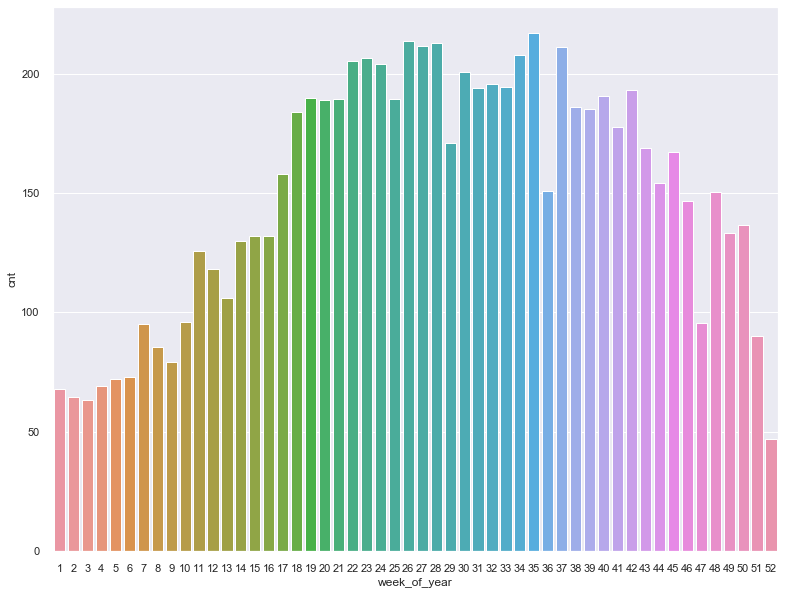

In [33]:
sns.barplot(x = df['week_of_year'], y = df['cnt'], estimator=np.median, ci=None)

In [34]:
# Specify categorical columns then convert them into numerical variables using one hot encoding

cat_cols = ['season', 'mnth', 'weekday', 'weathersit']

df = pd.get_dummies(df, columns=cat_cols)
df.shape

(17379, 42)

# Feature Selection

In [35]:
df.head()

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day,week_of_year,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,2011-01-01,2011,0,0,0,0.24,0.2879,0.81,0.0,3,13,16,1,52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,2011-01-01,2011,1,0,0,0.22,0.2727,0.80,0.0,8,32,40,1,52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,2011-01-01,2011,2,0,0,0.22,0.2727,0.80,0.0,5,27,32,1,52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,4,2011-01-01,2011,3,0,0,0.24,0.2879,0.75,0.0,3,10,13,1,52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,2011-01-01,2011,4,0,0,0.24,0.2879,0.75,0.0,0,1,1,1,52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


You should notice that the **cnt** column is a sum of the **casual + registered** columns. So we'll ignore the two columns during *feature selection* inorder to remove bias from our data.

We'll also ignore the **dteday** column since we have already extracted what we need from it

**instant** will also be ignored

In [36]:
df.columns

Index(['instant', 'dteday', 'yr', 'hr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'dteday_day', 'week_of_year', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Clear', 'weathersit_Heavy Rain', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [37]:
ignored_cols = ['casual', 'registered', 'instant', 'dteday', 'cnt', 'atemp']

In [38]:
# specifying our features and target

x = df.drop(columns=ignored_cols)

y = df['cnt']

# Model Development

In [39]:
# Divide our dataset into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=7)

x_train.shape, x_test.shape

((13903, 36), (3476, 36))

In [40]:
# Linear Regression Algorithm

lr = LinearRegression()

# train model
lr.fit(x_train, y_train)

# use trained model to make predictions on x_test
y_pred_lr = lr.predict(x_test)

**Evaluation Metrics in Regression**
- https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
- https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d

In [41]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_lr))
lr_r2 = metrics.r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('Mean Absolute Error', lr_mae)
print('Mean Squared Error', lr_mse)
print('Root Mean Squared Error',lr_rmse)
print('R2 Score',lr_r2)

Linear Regression
Mean Absolute Error 105.00339135547517
Mean Squared Error 19769.02184552945
Root Mean Squared Error 10.247116245826197
R2 Score 0.3953185989581466


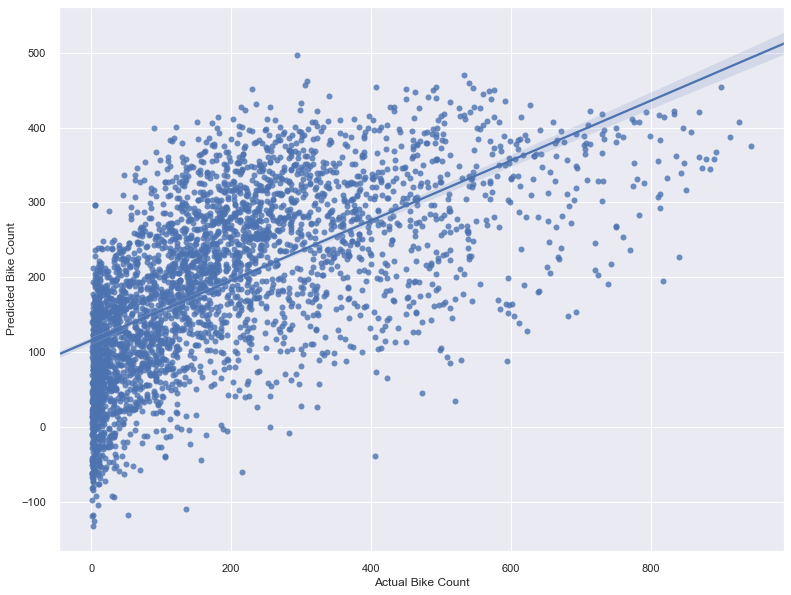

In [42]:
ax = sns.regplot(x = y_test, y = y_pred_lr)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()

In [43]:
# Decision Tree Algorithm

dt = DecisionTreeRegressor()

# train model
dt.fit(x_train, y_train)

# use trained model to make predictions on x_test
y_pred_dt = dt.predict(x_test)

In [44]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)
dt_mse = metrics.mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_dt))
dt_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Decision Tree')
print('Mean Absolute Error', dt_mae)
print('Mean Squared Error', dt_mse)
print('Root Mean Squared Error',dt_rmse)
print('R2 Score',dt_r2)

Decision Tree
Mean Absolute Error 33.085443037974684
Mean Squared Error 3049.4876294591486
Root Mean Squared Error 5.7519947007950805
R2 Score 0.9067243454608175


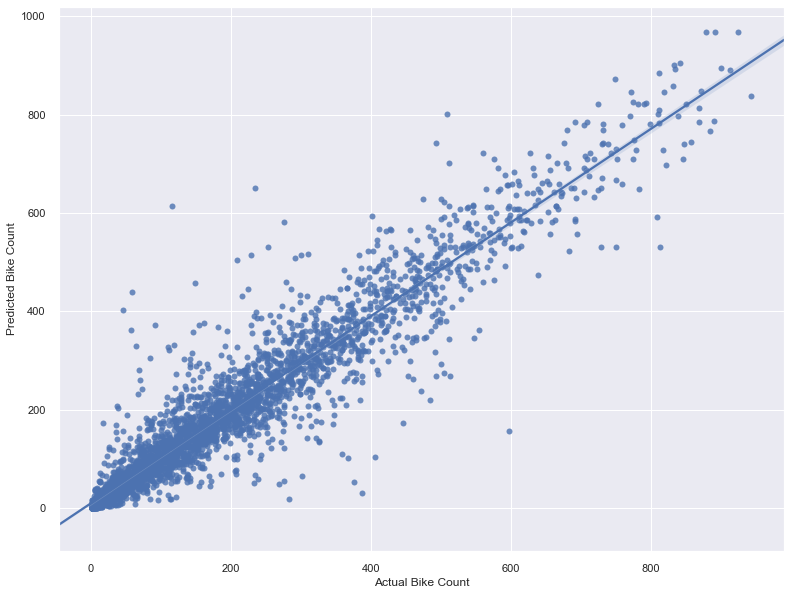

In [45]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()

[0.7079031475976526, 0.8590357610266849, 0.8588341622911096, 0.8357862529340605, 0.8237933282417836, 0.8136816584284831, 0.8007217606892416, 0.7914398147324432, 0.7799988440147856, 0.7667045461396673, 0.7537020634172782, 0.7424843417485035, 0.7332930454255561, 0.7226048227534361, 0.7145117597176414, 0.706964600370038, 0.6987177008738668, 0.6900659208832026, 0.6817691942277003, 0.6730965858853806]


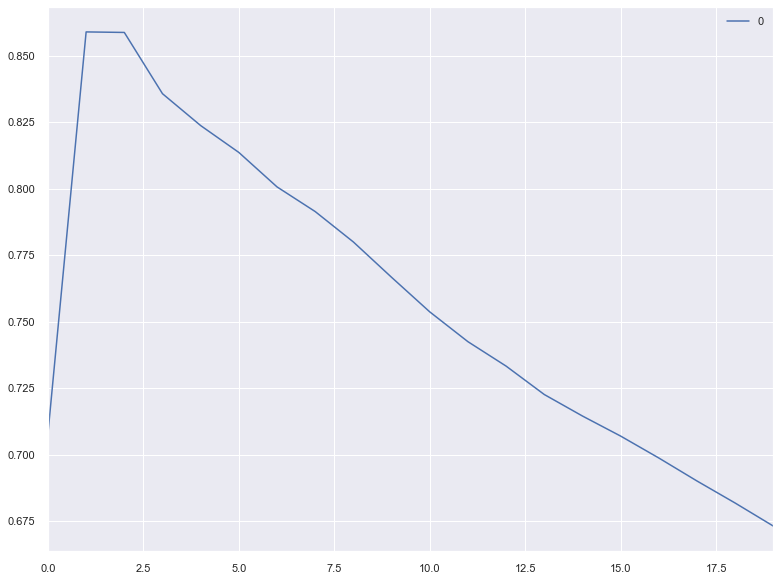

In [46]:
r2_score_yetu = []

for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2_value = metrics.r2_score(y_test, pred)
    r2_score_yetu.append(r2_value)
    
print(r2_score_yetu)
pd.DataFrame(r2_score_yetu).plot()

In [47]:
# K Nearest Neighbor

knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [48]:
knn_mae = metrics.mean_absolute_error(y_test, y_pred_knn)
knn_mse = metrics.mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_knn))
knn_r2 = metrics.r2_score(y_test, y_pred_knn)

print('K Neighbors Regressor')
print('Mean Absolute Error', knn_mae)
print('Mean Squared Error', knn_mse)
print('Root Mean Squared Error',knn_rmse)
print('R2 Score',knn_r2)

K Neighbors Regressor
Mean Absolute Error 41.51467203682394
Mean Squared Error 4608.58414844649
Root Mean Squared Error 6.443188033638623
R2 Score 0.8590357610266849


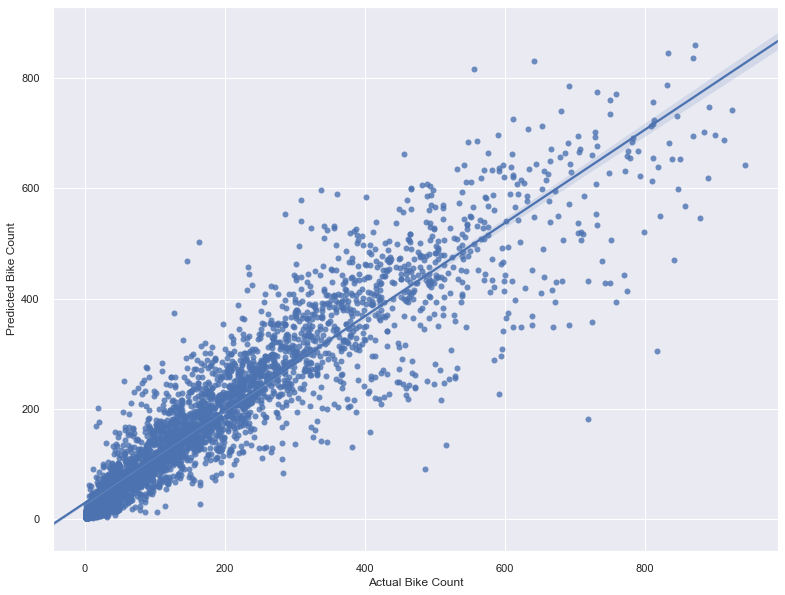

In [49]:
ax = sns.regplot(x = y_test, y = y_pred_knn)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()

**Random Forest**

Make sure to read this for you to get a great understanding of how the Random Forest Algorithm works
- https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d
- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [50]:
# Random Forest

rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
y_pred_rf = rf.predict(x_test)

In [52]:
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_rf))
rf_r2 = metrics.r2_score(y_test, y_pred_rf)

print('Random Forest Regressor')
print('Mean Absolute Error', rf_mae)
print('Mean Squared Error', rf_mse)
print('Root Mean Squared Error',rf_rmse)
print('R2 Score',rf_r2)

Random Forest Regressor
Mean Absolute Error 24.569369965477563
Mean Squared Error 1734.0607615937859
Root Mean Squared Error 4.9567499397768255
R2 Score 0.9469597282553789


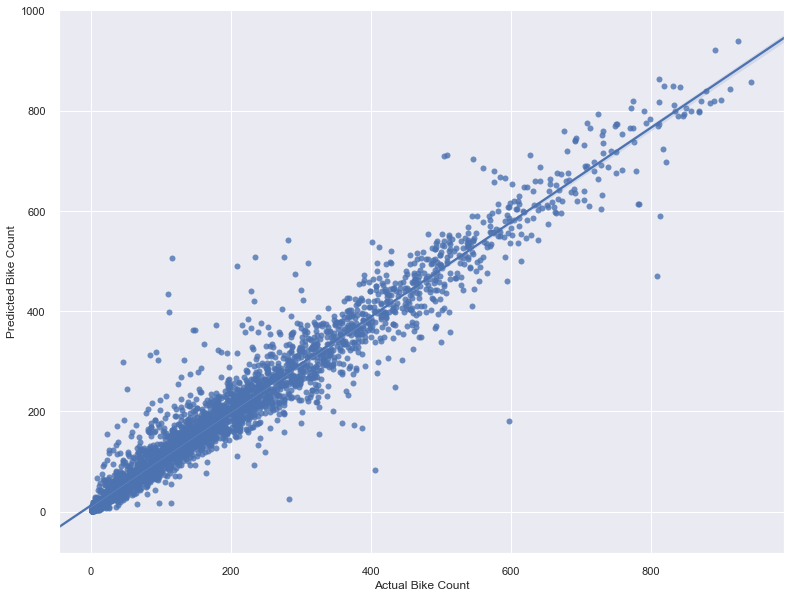

In [53]:
ax = sns.regplot(x = y_test, y = y_pred_rf)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()